# GROUP NAME: HERCODE ANALYTICS

# IMPORT LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\tlynx\Downloads\Road Traffic Accident.csv')

# DATA CLEANING

In [5]:
df.dtypes

Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Lanes_or_Medians           object
Types_of_Junction          object
Road_surface_type          object
Light_conditions           object
Weather_conditions         object
Type_of_collision          object
Vehicle_movement           object
Pedestrian_movement        object
Cause_of_accident          object
Accident_severity           int64
dtype: object

In [6]:
df.isnull().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [7]:
df.duplicated().sum()

390

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(11926, 15)

In [11]:
df.describe()

,Accident_severity
count,11926.000000
mean,1.827855
std,0.411123
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11926 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       11926 non-null  object
 1   Sex_of_driver            11926 non-null  object
 2   Educational_level        11926 non-null  object
 3   Vehicle_driver_relation  11926 non-null  object
 4   Driving_experience       11926 non-null  object
 5   Lanes_or_Medians         11926 non-null  object
 6   Types_of_Junction        11926 non-null  object
 7   Road_surface_type        11926 non-null  object
 8   Light_conditions         11926 non-null  object
 9   Weather_conditions       11926 non-null  object
 10  Type_of_collision        11926 non-null  object
 11  Vehicle_movement         11926 non-null  object
 12  Pedestrian_movement      11926 non-null  object
 13  Cause_of_accident        11926 non-null  object
 14  Accident_severity        11926 non-null  in

In [13]:
df.count()

Age_band_of_driver         11926
Sex_of_driver              11926
Educational_level          11926
Vehicle_driver_relation    11926
Driving_experience         11926
Lanes_or_Medians           11926
Types_of_Junction          11926
Road_surface_type          11926
Light_conditions           11926
Weather_conditions         11926
Type_of_collision          11926
Vehicle_movement           11926
Pedestrian_movement        11926
Cause_of_accident          11926
Accident_severity          11926
dtype: int64

QUESTIONS

1. What are the most frequent causes of road accidents and it's severity
2. How many accidents occurred in each weather condition and light?
3. What age band has the highest number of accidents?
4. What impact does the qualifications of the driver have on the cause of accident?
a.Educational level
b.Driving experience
c.Vehicle Driver relation 
d. Compare veicle driver relation with driving experience to examine if drivers employed are qualified ?
5. What type of road records the highest accidents?

# INTRODUCTION

Our Story 
Every day in Nigeria, the roads tell a silent story. One of movement, urgency, and, too often, tragedy.
According to the Federal Road Safety Corps (FRSC, 2024), over 30,000 people lose their lives annually to road traffic accidents, making Nigeria one of the countries with the highest road fatality rates in Africa. Behind these numbers lie not just statistics, but families shattered and communities changed forever.

 Introduction 

Road traffic accidents (RTAs) are one of the major causes of injuries, disabilities, and deaths worldwide. They occur when vehicles collide with other vehicles, pedestrians, animals, road debris, or other obstacles.

Aim: To analyze road traffic accident data in order to identify the major causes, patterns, and trends of accidents, and to provide insights that can help improve road safety and reduce the rate of accidents.


 Objectives: 
1. Identify the major causes of accidents
2. Evaluate drivers' demographics and environmental conditions to see the impact they have on accidents
3. Recommend safety improvements for relevant government agencies and policymakers.


# ANALYSIS (DESCRIPTIVE AND DIAGNOSTIC)

# 1. What are the most frequent causes of road accidents and the severity

In [14]:
Causes_of_accidents = df['Cause_of_accident'].value_counts().reset_index(name='Frequency').head(5)
Causes_of_accidents

,Cause_of_accident,Frequency
0,No distancing,2145
1,Changing lane to the right,1724
2,Changing lane to the left,1421
3,Driving carelessly,1360
4,No priority to vehicle,1173


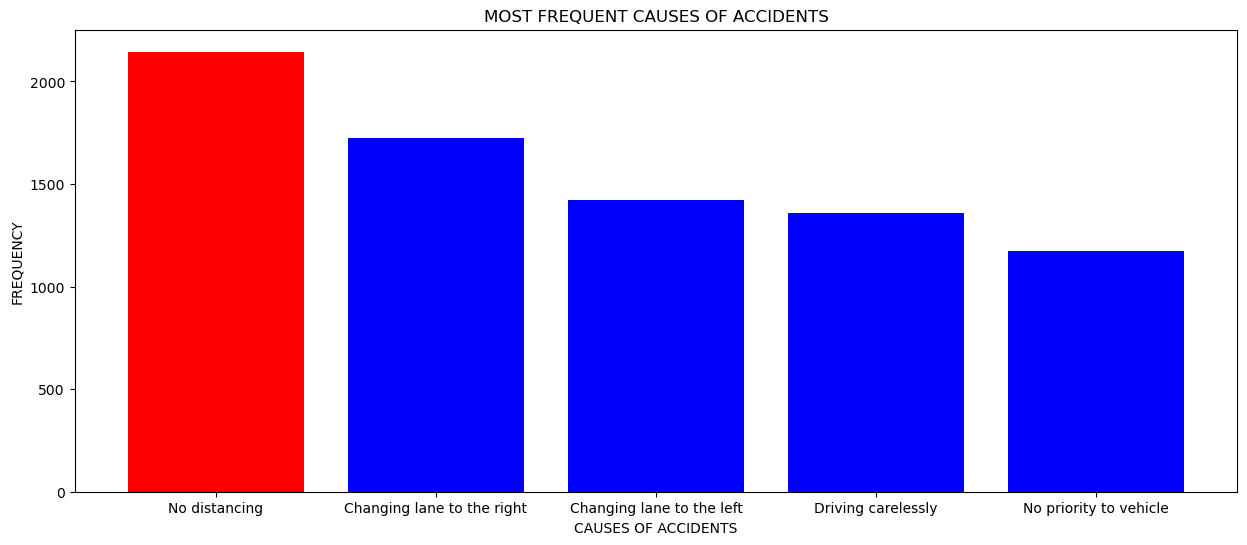

In [20]:
plt.figure(figsize=(15,6))
plt.bar(Causes_of_accidents['Cause_of_accident'],Causes_of_accidents['Frequency'],color=['red','blue','blue','blue','blue'])
plt.xlabel('CAUSES OF ACCIDENTS')
plt.ylabel('FREQUENCY')
plt.title('MOST FREQUENT CAUSES OF ACCIDENTS')
plt.show()

In [15]:
Cause = pd.crosstab(index = df['Cause_of_accident'], columns = df['Accident_severity'])
Cause

Accident_severity,0,1,2
Cause_of_accident,,,
Changing lane to the left,16,204,1201
Changing lane to the right,23,258,1443
Driving at high speed,2,31,140
Driving carelessly,22,208,1130
Driving to the left,4,53,225
Driving under the influence of drugs,5,46,289
Drunk driving,0,3,24
Getting off the vehicle improperly,3,29,164
Improper parking,1,2,22


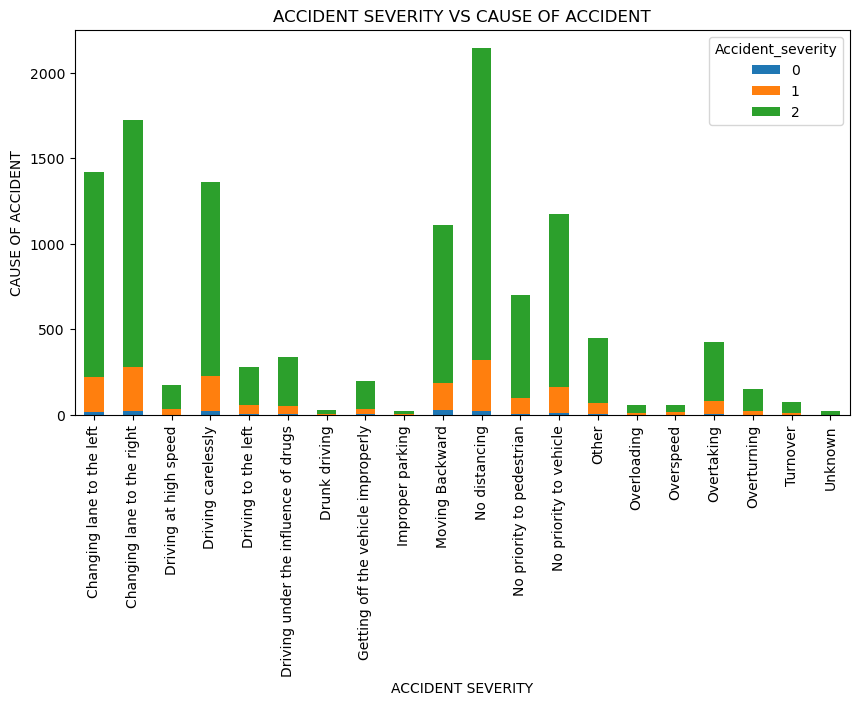

In [38]:
Cause.plot(kind = 'bar', stacked = True, figsize = (10,5))
plt.title('ACCIDENT SEVERITY VS CAUSE OF ACCIDENT')
plt.xlabel('ACCIDENT SEVERITY')
plt.ylabel('CAUSE OF ACCIDENT')
plt.show()

# 2. How many accidents occurred in each weather condition and light?

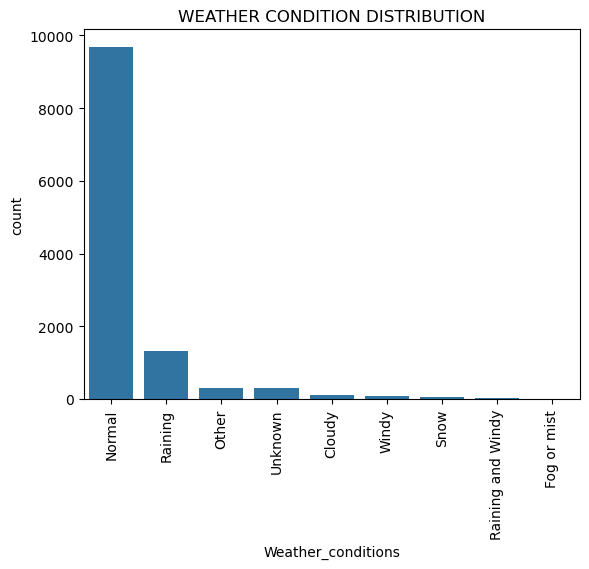

In [25]:
df['Weather_conditions'].value_counts().reset_index()
sns.countplot(x= 'Weather_conditions', data = df, order = df['Weather_conditions'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('WEATHER CONDITION DISTRIBUTION')
plt.show()

In [36]:
Weather = pd.crosstab(index = df['Weather_conditions'], columns = df['Light_conditions'])

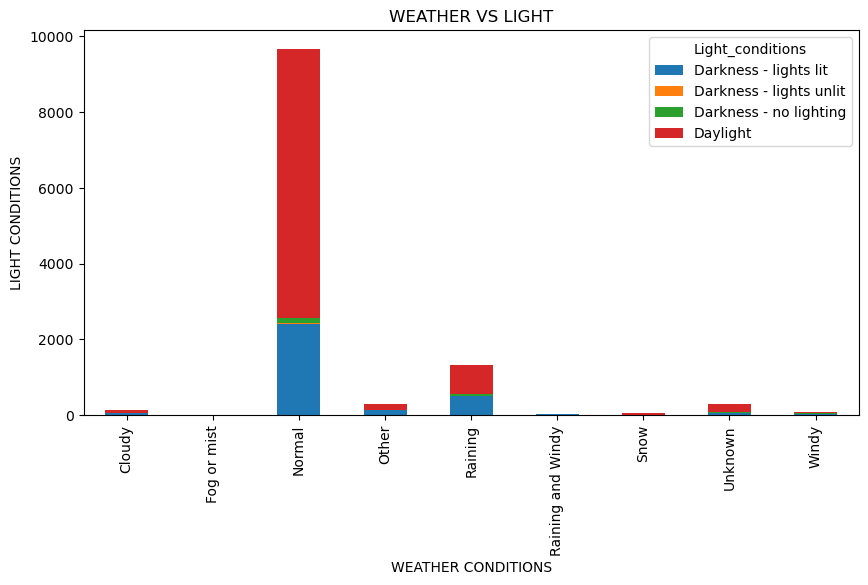

In [37]:
Weather.plot(kind = 'bar', stacked = True, figsize = (10,5))
plt.title('WEATHER VS LIGHT')
plt.xlabel('WEATHER CONDITIONS')
plt.ylabel('LIGHT CONDITIONS')
plt.show()

# 3. Which age band has the highest number of accidents?

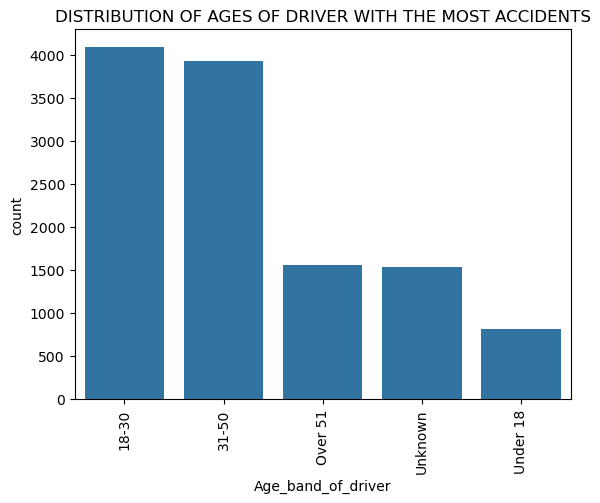

In [20]:
df['Age_band_of_driver'].value_counts().reset_index()
sns.countplot(x= 'Age_band_of_driver', data = df, order = df['Age_band_of_driver'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('DISTRIBUTION OF AGES OF DRIVER WITH THE MOST ACCIDENTS')
plt.show()

# 4. What impact does the qualifications of the driver have on the cause of accident?
# a..Driving experience
# b.Educational level
# c.Vehicle Driver relation
# d. Compare veicle driver relation with driving experience to examine if drivers employed are qualified?

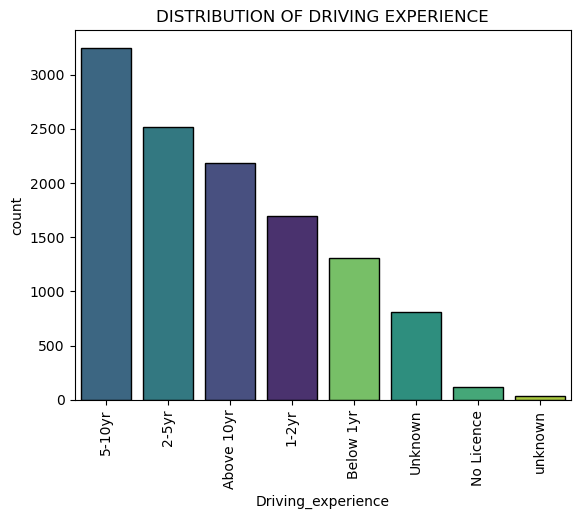

In [21]:
sns.countplot(
    x='Driving_experience',
    hue='Driving_experience',         # same variable
    data=df,
    palette='viridis',
    edgecolor = 'black',
    order=df['Driving_experience'].value_counts().index,
    legend=False                      # hide duplicate legend
)

plt.xticks(rotation=90)
plt.title('DISTRIBUTION OF DRIVING EXPERIENCE')
plt.show()


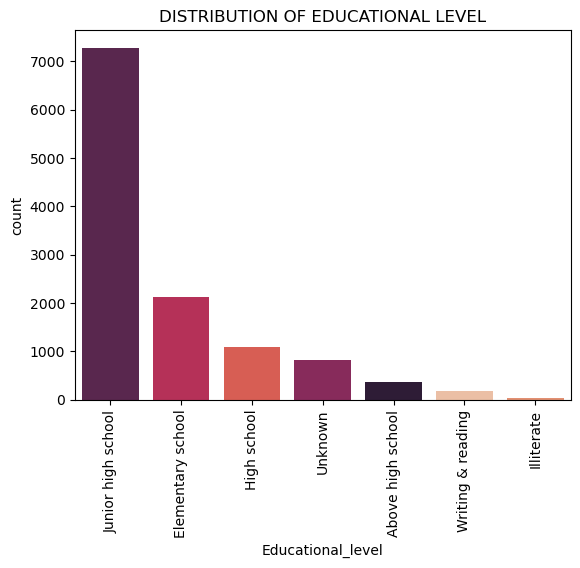

In [22]:
df['Educational_level'].value_counts().reset_index(name = 'Frequency')
sns.countplot(x= 'Educational_level', 
              hue = 'Educational_level',
              palette = 'rocket',
              data = df, 
              order = df['Educational_level'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('DISTRIBUTION OF EDUCATIONAL LEVEL')
plt.show()

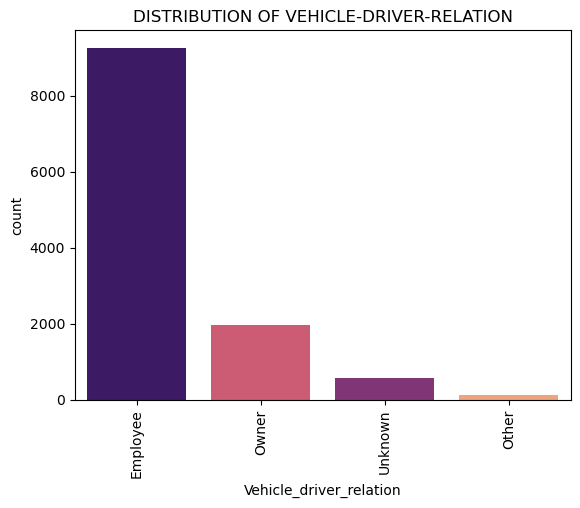

In [25]:
df['Vehicle_driver_relation'].value_counts().reset_index(name = 'Frequency')
sns.countplot(x= 'Vehicle_driver_relation', 
              data = df,
              hue='Vehicle_driver_relation',
              palette = 'magma',
              legend=False,      
              order = df['Vehicle_driver_relation'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('DISTRIBUTION OF VEHICLE-DRIVER-RELATION')
plt.show()

# 5. What type of road records the highest accidents?

In [32]:
df['Road_surface_type'].value_counts()

Road_surface_type
Asphalt roads                       10907
Earth roads                           357
Gravel roads                          242
Unknown                               172
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64

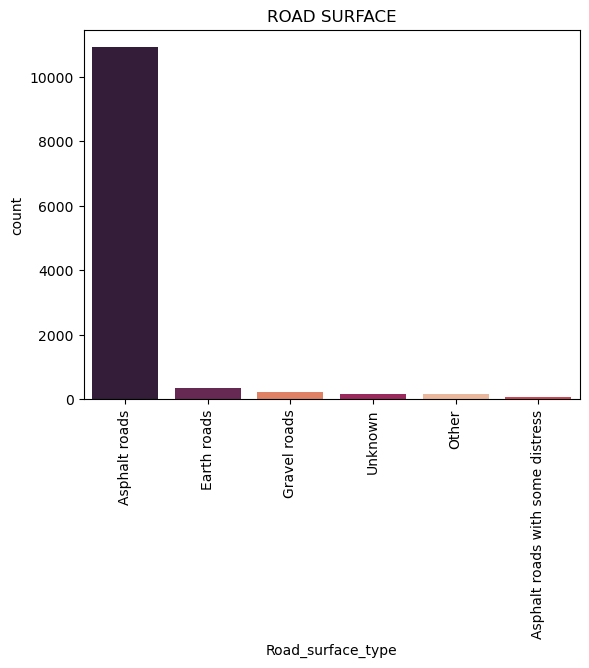

In [33]:
Road = df['Road_surface_type'].value_counts().reset_index()
sns.countplot(x= 'Road_surface_type', 
              hue = 'Road_surface_type',
              palette = 'rocket',
              data = df, 
              order = df['Road_surface_type'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('ROAD SURFACE')
plt.show()

# PRESCRIPTIVE ANALYSIS

RECOMMENDATION

    •	Promote public awareness and defensive driving training to ensure safe following distances.
	•	Enforce traffic laws and use technology (speed cameras, collision warnings) to prevent tailgating.
	•	Improve asphalt roads with clear markings, speed control measures, and regular maintenance.
	•	Strengthen employer responsibility through driver training, vehicle maintenance, and monitoring systems.
	•	Combine education, enforcement, and road design improvements to significantly reduce accidents and improve overall road safety.